In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc as calculate_auc
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggModel
from aggmap import show

In [2]:
data = load_breast_cancer()
dfx = pd.DataFrame(data.data, columns= data.feature_names)
y = pd.Series(data.target).map({0:'malignant', 1:'benign'})
dfy = pd.get_dummies(y)
X = dfx.values.astype(float)
Y = dfy.values.astype(float)


mp = AggMap(dfx, metric = 'correlation')
mp.fit(cluster_channels = 5, verbose = 0)

2020-08-19 18:15:20,273 - INFO - [bidd-aggmap] - Calculating distance ...
2020-08-19 18:15:20,275 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 30/30 [00:00<00:00, 1720.62it/s]


2020-08-19 18:15:21,307 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-19 18:15:23,976 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-19 18:15:23,987 - INFO - [bidd-aggmap] - Finished


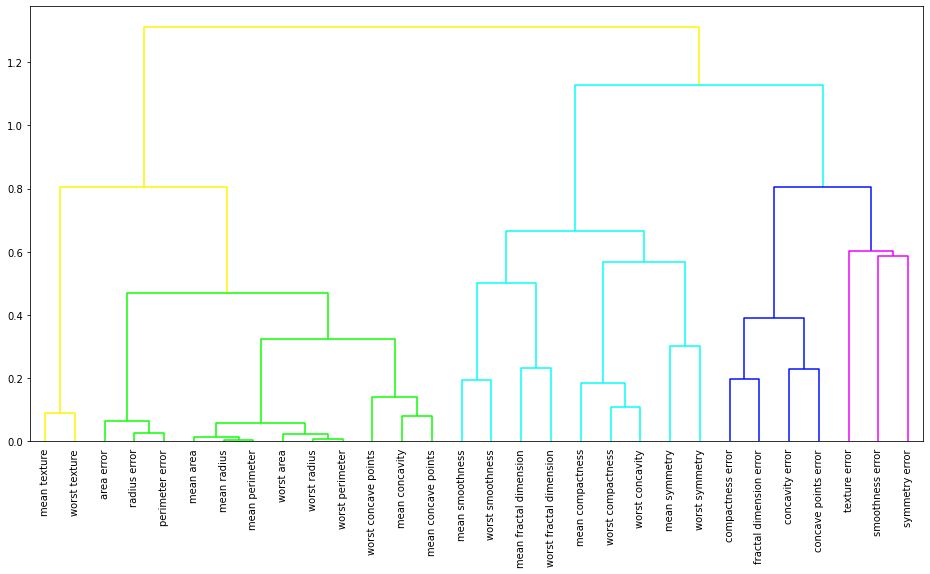

In [3]:
fig_tree = mp.plot_tree(leaf_font_size = 10)
fig_tree.savefig('covid-19.cluster5_tree.png', bbox_inches='tight', dpi=300)

In [4]:
mp.plot_scatter(enabled_data_labels = True, htmlname = 'BCD.C3_scatter',radius=5)

2020-08-19 18:15:24,922 - INFO - [bidd-aggmap] - generate file: ./BCD.C3_scatter_feature points_30_correlation_umap_scatter
2020-08-19 18:15:24,936 - INFO - [bidd-aggmap] - save html file to ./BCD.C3_scatter_feature points_30_correlation_umap_scatter


In [5]:
mp.plot_grid(enabled_data_labels = True, htmlname = 'BCD.C3_grid')

2020-08-19 18:15:24,943 - INFO - [bidd-aggmap] - generate file: ./BCD.C3_grid_feature points_30_correlation_umap_mp
2020-08-19 18:15:24,953 - INFO - [bidd-aggmap] - save html file to ./BCD.C3_grid_feature points_30_correlation_umap_mp


In [6]:
X_new = mp.batch_transform(X, scale_method= 'standard')

100%|##########| 569/569 [00:02<00:00, 219.48it/s]


In [7]:
X_new.shape

(569, 6, 5, 5)

In [8]:
idx = y.to_frame(name = 'label').groupby('label').apply(lambda x:x.index.tolist())
idx

label
benign       [19, 20, 21, 37, 46, 48, 49, 50, 51, 52, 55, 5...
malignant    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
dtype: object

In [9]:
sns.reset_orig()

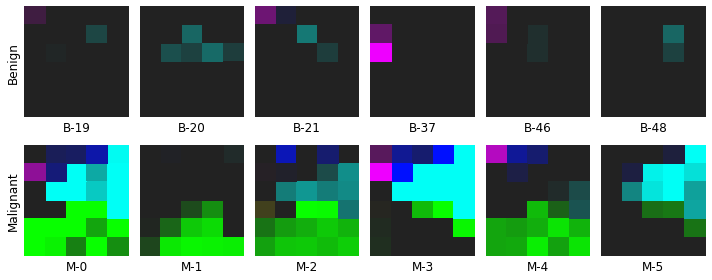

In [10]:
rows = idx.index.tolist()
rows = rows[:2]

n = 6
fontsize = 12

fig, axes = plt.subplots(nrows=2, ncols=n, figsize=(10,4), sharex = True, sharey = True)

row_names = rows

for row, row_ax in zip(rows, axes):
    pidx = idx.loc[row][:n]        
    for pid, ax in zip(pidx, row_ax):
        if 'benign' in row:
            pid_name = 'B-%s' % pid
        else:
            pid_name = 'M-%s' % pid
            
        x = X_new[pid]
        #ax.imshow(.sum(axis=-1))
        show.imshow(x, ax = ax,  mode = 'dark', color_list= pd.Series(mp.colormaps).tolist(), x_max=1, vmin=0.2, vmax=2)
        ax.set_xlabel(pid_name, fontsize = fontsize) 

for ax, row in zip(axes[:,0], row_names):
    ax.set_ylabel(row.capitalize(), fontsize = fontsize)  

fig.tight_layout()
fig.savefig('./fmp.png', bbox_inches='tight', dpi=300) 